# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
#importing relevant packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv")

In [ ]:
df

v7  v9 v10  v14 v56 v57 v58 v59  ... v263 v264 v265 v266 v267 v268 v269 bald
0      2   1   1    1   1   1   1   2  ...    2    1    4    4    3    2    2   48
1      1   1   2    0   1   1   2   2  ...    2    2    2    1    2    2    1   30
2      1   1   2    0   1   1   1   1  ...    2    1    2    2    2    1    1   57
3      2   1   1    1   .   1   1   2  ...    2    2    4    3    3    3    2   55
4      1   1   2    0   1   1   2   1  ...    4    4    4    3    3    2    4   27
...   ..  ..  ..  ...  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...
1018   1   1   1    2   2   1   1   1  ...    2    3    2    2    2    3    2   47
1019   1   1   1    2   2   1   2   2  ...    .    .    .    .    .    .    .   54
1020   1   2   .    2   1   1   1   1  ...    2    3    4    3    3    2    3   47
1021   1   1   2    0   2   1   1   1  ...    2    2    3    3    2    2    2   26
1022   2   2   .    1   2   2   1   1  ...    2    2    .    .    .    2    2   53

[1023 rows x 91 columns]

In [ ]:
df.head() 

v7  v9 v10  v14 v56 v57 v58 v59  ... v263 v264 v265 v266 v267 v268 v269 bald
0   2   1   1    1   1   1   1   2  ...    2    1    4    4    3    2    2   48
1   1   1   2    0   1   1   2   2  ...    2    2    2    1    2    2    1   30
2   1   1   2    0   1   1   1   1  ...    2    1    2    2    2    1    1   57
3   2   1   1    1   .   1   1   2  ...    2    2    4    3    3    3    2   55
4   1   1   2    0   1   1   2   1  ...    4    4    4    3    3    2    4   27

[5 rows x 91 columns]

In [ ]:
df.groupby(["v256", "v269"]).mean()

v7        v9       v14       bald
v256 v269                                         
.    .     1.470588  1.470588  1.647059  49.235294
     1     1.500000  1.333333  1.000000  37.166667
     2     1.714286  1.285714  1.600000  43.114286
     3     1.615385  1.461538  1.384615  41.846154
     4     1.333333  1.333333  0.000000  33.333333
1    1     1.586207  1.310345  1.517241  55.482759
     2     1.666667  1.395833  1.833333  52.354167
     3     1.714286  1.285714  1.285714  41.000000
     4     1.000000  2.000000  3.000000  88.000000
2    .     1.833333  1.500000  1.916667  57.916667
     1     1.436620  1.154930  1.450704  44.140845
     2     1.501618  1.249191  1.815534  46.482201
     3     1.554054  1.229730  1.810811  47.054054
     4     1.500000  1.200000  2.000000  50.300000
3    .     1.833333  1.500000  1.916667  56.166667
     1     1.295455  1.363636  1.590909  45.045455
     2     1.489362  1.303191  1.420213  41.984043
     3     1.520000  1.306667  1.853333  46.866667
     4     1.428571  1.142857  2.142857  43.285714
4    .     2.000000  1.000000  1.500000  39.500000
     1     1.222222  1.333333  1.222222  42.555556
     2     1.300000  1.566667  1.666667  42.266667
     3     1.315789  1.315789  1.578947  37.894737
     4     2.000000  1.500000  1.000000  36.000000

In [ ]:
df=df.replace('.', np.NaN)

In [ ]:
df = df.dropna(axis=0,how='any', subset=('v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269'))

In [ ]:
df.info()

In [ ]:
X = df[['v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]
X_1 = df[['v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]
linked = linkage(X, 'ward') #I create "linked" as a frame to hold information about how Wards method will prefer clustering to make a fancy dendrogram

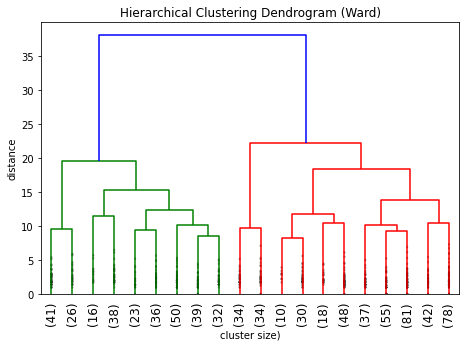

In [ ]:
#Creating a cool dendrogram:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df['cluster'+k]=labels

Cluster count- 2 |  db score- 2.31 |  ch score -  126.75 |  ss score -  0.14
Cluster count- 3 |  db score- 2.39 |  ch score -  89.86 |  ss score -  0.09
Cluster count- 4 |  db score- 2.68 |  ch score -  75.08 |  ss score -  0.08
Cluster count- 5 |  db score- 2.59 |  ch score -  67.36 |  ss score -  0.07
Cluster count- 6 |  db score- 2.66 |  ch score -  60.41 |  ss score -  0.07
Cluster count- 7 |  db score- 2.8 |  ch score -  55.03 |  ss score -  0.04
Cluster count- 8 |  db score- 2.81 |  ch score -  50.56 |  ss score -  0.04
Cluster count- 9 |  db score- 2.73 |  ch score -  47.0 |  ss score -  0.05
Cluster count- 10 |  db score- 2.64 |  ch score -  44.21 |  ss score -  0.05


Davies Bouldin Score → as low as possible - is is pretty low!

Calinski-Harabasz → as high as possible - stort spring mlm 2 og 3 cluster(2clusters er nok optimalt)

Silhouette-score → is a -1 to +1 thing. 0 is bad while values closer to the edges are better. Ligger ret dårligt.

In [ ]:
df.describe() # f.eks. for cluster 2: går fra 0-1. Ikke den bedste deskriptive karakteristik.

v7          v9         v14  ...    cluster8    cluster9  cluster10
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.00000
mean     1.447917    1.256510    1.664062  ...    3.520833    3.968750    3.72526
std      0.497604    0.436991    1.343936  ...    2.332712    2.341522    2.70521
min      1.000000    1.000000    0.000000  ...    0.000000    0.000000    0.00000
25%      1.000000    1.000000    0.000000  ...    1.000000    2.000000    1.00000
50%      1.000000    1.000000    2.000000  ...    4.000000    4.000000    4.00000
75%      2.000000    2.000000    2.000000  ...    6.000000    6.000000    6.00000
max      2.000000    2.000000    9.000000  ...    7.000000    8.000000    9.00000

[8 rows x 13 columns]

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
df['cluster']=labels

In [ ]:
df['id']=range(1, 769) # fordi der i nedenstående kommando refereres til 'id' variabel som ikke findes i dette datasæt.

In [ ]:
df['v256']=df['v256'].astype('int') #konverterer strings til integers
df['v257']=df['v257'].astype('int')
df['v258']=df['v258'].astype('int')
df['v259']=df['v259'].astype('int')
df['v260']=df['v260'].astype('int')
df['v261']=df['v261'].astype('int')
df['v262']=df['v262'].astype('int')
df['v263']=df['v263'].astype('int')
df['v264']=df['v264'].astype('int')
df['v265']=df['v265'].astype('int')
df['v266']=df['v266'].astype('int')
df['v267']=df['v267'].astype('int')
df['v268']=df['v268'].astype('int')
df['v269']=df['v269'].astype('int')



... and the results for 2 clusters are!
cluster2     0     1
v256      2.26  2.61
v257      2.10  2.77
v258      2.09  2.27
v259      2.62  2.93
v260      2.54  2.58
v261      1.69  2.02
v262      2.29  2.85
v263      2.28  2.71
v264      2.14  2.51
v265      2.64  3.37
v266      2.00  3.02
v267      1.99  2.83
v268      2.07  2.41
v269      1.93  2.24

And the size of the clusters if there are 2 clusters are
cluster2
0    467
1    301
Name: id, dtype: int64

And if we have 2 clusters, the dendrogram looks like


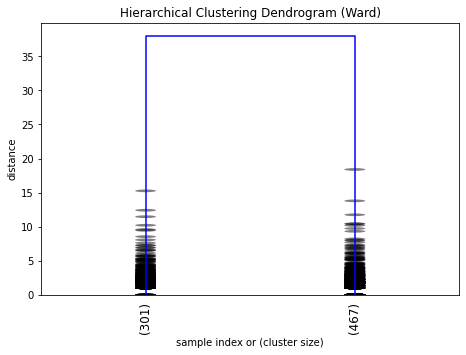



... and the results for 3 clusters are!
cluster3     0     1     2
v256      2.61  2.29  2.09
v257      2.77  2.13  1.90
v258      2.27  2.15  1.76
v259      2.93  2.70  2.10
v260      2.58  2.60  2.24
v261      2.02  1.79  1.09
v262      2.85  2.39  1.72
v263      2.71  2.36  1.79
v264      2.51  2.22  1.65
v265      3.37  2.71  2.22
v266      3.02  2.06  1.66
v267      2.83  2.05  1.68
v268      2.41  2.18  1.44
v269      2.24  2.06  1.16

And the size of the clusters if there are 3 clusters are
cluster3
0    301
1    399
2     68
Name: id, dtype: int64

And if we have 3 clusters, the dendrogram looks like


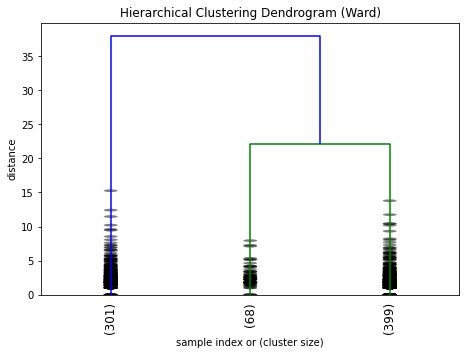



... and the results for 4 clusters are!
cluster4     0     1     2     3
v256      2.29  2.53  2.09  2.87
v257      2.13  2.68  1.90  3.09
v258      2.15  2.16  1.76  2.67
v259      2.70  2.85  2.10  3.21
v260      2.60  2.53  2.24  2.75
v261      1.79  1.91  1.09  2.42
v262      2.39  2.71  1.72  3.36
v263      2.36  2.62  1.79  3.06
v264      2.22  2.39  1.65  2.93
v265      2.71  3.27  2.22  3.72
v266      2.06  2.86  1.66  3.60
v267      2.05  2.67  1.68  3.37
v268      2.18  2.32  1.44  2.70
v269      2.06  2.10  1.16  2.73

And the size of the clusters if there are 4 clusters are
cluster4
0    399
1    234
2     68
3     67
Name: id, dtype: int64

And if we have 4 clusters, the dendrogram looks like


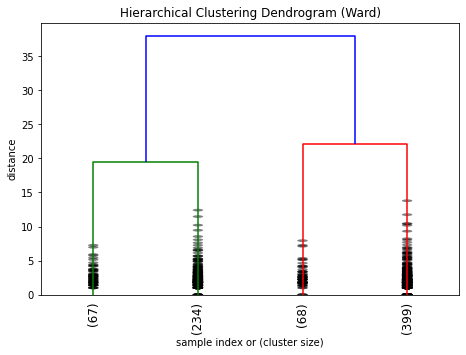



... and the results for 5 clusters are!
cluster5     0     1     2     3     4
v256      2.53  2.33  2.09  2.87  2.18
v257      2.68  2.16  1.90  3.09  2.06
v258      2.16  2.03  1.76  2.67  2.48
v259      2.85  2.61  2.10  3.21  2.97
v260      2.53  2.50  2.24  2.75  2.86
v261      1.91  1.82  1.09  2.42  1.72
v262      2.71  2.23  1.72  3.36  2.84
v263      2.62  2.16  1.79  3.06  2.92
v264      2.39  2.09  1.65  2.93  2.58
v265      3.27  2.60  2.22  3.72  3.02
v266      2.86  2.14  1.66  3.60  1.82
v267      2.67  2.13  1.68  3.37  1.81
v268      2.32  2.10  1.44  2.70  2.41
v269      2.10  2.06  1.16  2.73  2.04

And the size of the clusters if there are 5 clusters are
cluster5
0    234
1    293
2     68
3     67
4    106
Name: id, dtype: int64

And if we have 5 clusters, the dendrogram looks like


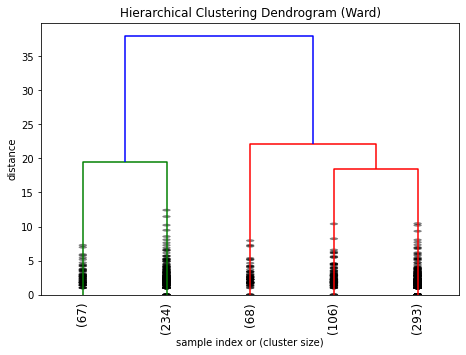

In [ ]:
for i in range(2,6):
    i=str(i)
    X_1=df[['cluster'+i, 'v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]
    stuff=X_1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=df.groupby(['cluster'+i])['id'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

In [ ]:
# Your solutions from here...

In [ ]:
## Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt


sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.head()

satisfaction  evaluation  number_of_projects  ...  promotion  department  salary
0          0.38        0.53                   2  ...          0       sales     low
1          0.80        0.86                   5  ...          0       sales  medium
2          0.11        0.88                   7  ...          0       sales  medium
3          0.72        0.87                   5  ...          0       sales     low
4          0.37        0.52                   2  ...          0       sales     low

[5 rows x 10 columns]

In [ ]:
data.describe()

satisfaction    evaluation  ...         churn     promotion
count  14999.000000  14999.000000  ...  14999.000000  14999.000000
mean       0.612834      0.716102  ...      0.238083      0.021268
std        0.248631      0.171169  ...      0.425924      0.144281
min        0.090000      0.360000  ...      0.000000      0.000000
25%        0.440000      0.560000  ...      0.000000      0.000000
50%        0.640000      0.720000  ...      0.000000      0.000000
75%        0.820000      0.870000  ...      0.000000      0.000000
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 8 columns]

In [ ]:
dummy1=pd.get_dummies(data['department']) #laver dummy-variabler for de to categoriske (department og sales)
dummy1.head()

IT  RandD  accounting  hr  ...  product_mng  sales  support  technical
0   0      0           0   0  ...            0      1        0          0
1   0      0           0   0  ...            0      1        0          0
2   0      0           0   0  ...            0      1        0          0
3   0      0           0   0  ...            0      1        0          0
4   0      0           0   0  ...            0      1        0          0

[5 rows x 10 columns]

In [ ]:
dummy2=pd.get_dummies(data['salary'])
dummy2.head()

high  low  medium
0     0    1       0
1     0    0       1
2     0    0       1
3     0    1       0
4     0    1       0

In [ ]:
data=pd.concat([data,dummy1, dummy2], axis=1) #dummy-variablerne merges på ude til højre
data.head()

satisfaction  evaluation  number_of_projects  ...  high  low  medium
0          0.38        0.53                   2  ...     0    1       0
1          0.80        0.86                   5  ...     0    0       1
2          0.11        0.88                   7  ...     0    0       1
3          0.72        0.87                   5  ...     0    1       0
4          0.37        0.52                   2  ...     0    1       0

[5 rows x 23 columns]

In [ ]:
del data['department']

In [ ]:
del data['salary']

In [ ]:
data

satisfaction  evaluation  number_of_projects  ...  high  low  medium
0              0.38        0.53                   2  ...     0    1       0
1              0.80        0.86                   5  ...     0    0       1
2              0.11        0.88                   7  ...     0    0       1
3              0.72        0.87                   5  ...     0    1       0
4              0.37        0.52                   2  ...     0    1       0
...             ...         ...                 ...  ...   ...  ...     ...
14994          0.40        0.57                   2  ...     0    1       0
14995          0.37        0.48                   2  ...     0    1       0
14996          0.37        0.53                   2  ...     0    1       0
14997          0.11        0.96                   6  ...     0    1       0
14998          0.37        0.52                   2  ...     0    1       0

[14999 rows x 21 columns]

In [ ]:
# Select the (independant) features that we are going to use to train the model
X = data.loc[:,'satisfaction':'medium'] # her kommer churn dog med, så laver ny variabel hvor den ikke er med

In [ ]:
del X['churn']

In [ ]:
X

satisfaction  evaluation  number_of_projects  ...  high  low  medium
0              0.38        0.53                   2  ...     0    1       0
1              0.80        0.86                   5  ...     0    0       1
2              0.11        0.88                   7  ...     0    0       1
3              0.72        0.87                   5  ...     0    1       0
4              0.37        0.52                   2  ...     0    1       0
...             ...         ...                 ...  ...   ...  ...     ...
14994          0.40        0.57                   2  ...     0    1       0
14995          0.37        0.48                   2  ...     0    1       0
14996          0.37        0.53                   2  ...     0    1       0
14997          0.11        0.96                   6  ...     0    1       0
14998          0.37        0.52                   2  ...     0    1       0

[14999 rows x 20 columns]

In [ ]:
# Define the dependant variabel / target to predict (churn)
y = data.churn

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels (churn into indices) #unødvendigt da Y er tal
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_float = encoder.fit_transform(['noget', 'noget'])

In [ ]:
# Transform labels into indices by passing y to the encoder # unødvendigt da Y er al
y_enc = encoder.fit_transform(y)

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.78583333 0.7925     0.78833333 0.79916667 0.78032514]


In [ ]:
# Model training #scorene angiver accuracy for hvert træningssæt (ovenfor) og her ses overall accuracy. Baseret på hyperparameter tuning?
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.7843333333333333


In [ ]:
#Visualisation:
!pip uninstall -qq mlxtend -y

In [ ]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend   

     |████████████████████████████████| 1.4MB 5.7MB/s 


In [ ]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

In [ ]:
# Now trying Random Forest:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.98916667 0.98958333 0.98833333 0.99083333 0.99124635]


In [ ]:
model.fit(X_train, y_train) #overall accuracy using Random Forest:
print(model.score(X_test, y_test))

0.987


#Regression - Try to predict the number of weekly average hours worked

In [ ]:
average_weekly_hours = data['average_montly_hours'] / 4

In [ ]:
data['average_weekly_hours']=average_weekly_hours

In [ ]:
data

satisfaction  evaluation  ...  medium  average_weekly_hours
0              0.38        0.53  ...       0                 39.25
1              0.80        0.86  ...       1                 65.50
2              0.11        0.88  ...       1                 68.00
3              0.72        0.87  ...       0                 55.75
4              0.37        0.52  ...       0                 39.75
...             ...         ...  ...     ...                   ...
14994          0.40        0.57  ...       0                 37.75
14995          0.37        0.48  ...       0                 40.00
14996          0.37        0.53  ...       0                 35.75
14997          0.11        0.96  ...       0                 70.00
14998          0.37        0.52  ...       0                 39.50

[14999 rows x 22 columns]

In [ ]:
# picking a different outcome variable

y_reg = data.average_weekly_hours

In [ ]:
# Overview of distribution of outcome variable
sns.boxplot(data.average_weekly_hours)

In [ ]:
# We need to creat new train / test splits here - as the montly_averagehours was not part of the previous split.

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2 (range 0-1 )
print(model.score(X_test, y_test))

1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


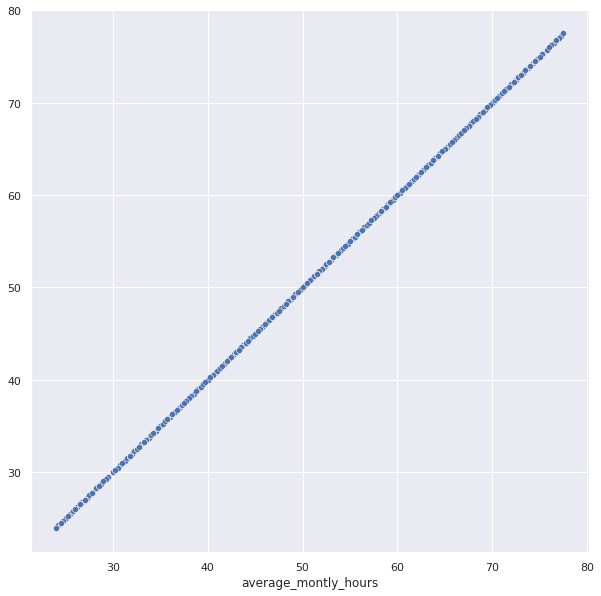

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test.info()

In [ ]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

[12:09:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9999635551912243


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


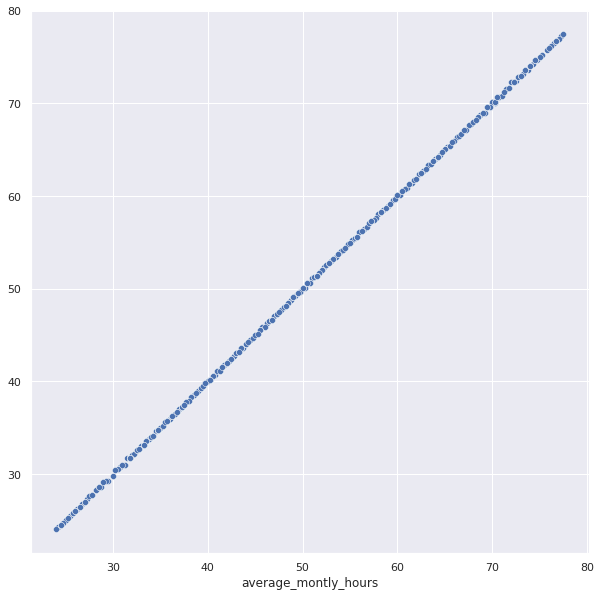

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

     |████████████████████████████████| 8.9MB 5.8MB/s 
     |████████████████████████████████| 2.2MB 46.0MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.3-cp36-none-any.whl size=9296309 sha256=2c1f545a1778a1d6b3dcc2ada3355886e2dfbea522240ec241fa6fcf638b05ba
  Stored in directory: /root/.cache/pip/wheels/dc/96/7b/9c9d48ed392511bc708e39580e18dc7a92f475795cd26b51bf
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
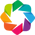

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653154

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.03651083062621142

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [ ]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

In [ ]:
# Your solutions here...

In [ ]:
#reciprocity for work: 100% agress on if they are coworkers!
nx.overall_reciprocity(G_work)

1.0

In [ ]:
#reciprocity for advice-network: only 40% agrees on if they have taken advice from each other?
nx.overall_reciprocity(G_advice)

0.3923766816143498

In [ ]:
#Identify communities in friendship and advice network: (Clustering =Community detection)
# Import libraries
import community # `python-louvain` is implemented here

In [ ]:
G_friendship2 = nx.from_pandas_adjacency(mat_friendship, create_using=nx.Graph) #slettet diGraph og skrevet Graph i stedet (undirected)
G_advice2 = nx.from_pandas_adjacency(mat_advice, create_using=nx.Graph)
G_work2 = nx.from_pandas_adjacency(mat_work, create_using=nx.Graph)

In [ ]:
# Communities in the friendship-group: Find the optimal partition with the Louvain algorithm.
friends_com = community.best_partition(G_friendship2)

In [ ]:
# The number of communities detected
max(friends_com.values())

5

In [ ]:
# Calculation of degree centrality: G_friendship2
cent_degree_friendship = dict(G_friendship2.degree)
nx.set_node_attributes(G_friendship2, cent_degree_friendship, 'cent_degree')

In [ ]:
# Create and save a layout
G_layout_friend = nx.layout.kamada_kawai_layout(G_friendship2)

In [ ]:
nx.set_node_attributes(G_friendship2, friends_com, 'friends_com')

g_plot = hv.Graph.from_networkx(G_friendship2, G_layout_friend).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='friends_com', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#now for the advice-group:
advice_com = community.best_partition(G_advice2)

In [ ]:
max(advice_com.values())

2

In [ ]:
# Calculation of degree centrality: G_advice2
cent_degree_friendship = dict(G_friendship2.degree)
nx.set_node_attributes(G_advice2, cent_degree_advice, 'cent_degree')

In [ ]:
G_layout3 = nx.layout.kamada_kawai_layout(G_advice2)

In [ ]:
nx.set_node_attributes(G_advice2, advice_com, 'advice_com') # index er nr. på presonen, advice_com:1 vil sige community 1 (de andre farver har andre communities) og cent_degree er hvor mange forbinelser - jo flere jo større prik.

g_plot = hv.Graph.from_networkx(G_advice2, G_layout3).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='advice_com', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))


## Network analysis: Case Study 2 in 2-Mode Networks: Exploring Instagram Hashtag Networks

In this notebook, we will collect data from Instagram to construct (snowball) a network of hashtags as well as a (2-mode) bipartite network of Instagram users and hashtags.

The networks in this example can be considered synthetic, since nodes and particularly edges represent virtual constructs rather than explicit connections.


In this case we explore

- Graph construction (normal and bipartite)
- Calculation of centrality indicators 
- Community detection
- Projection of bipartite network

Furthermore you will learn:

- to make simple (public) API requests (API: Application Programming Interface) 
- parse json response
- perform simple string manipulation/text-mining to extract features of interest (Transition into NLP)

### So what?

Such an analysis can be useful in marketing to identify sub-dicussions in a niche or related to a brand. We will detect popular hashtags within sub-niches that "correlate" with a topic of interest.
Furthermore, we will identify accounts with high engagement (post-counts) within specific hashtag communities.

Unfortunately Instagram, very recently (few days back), diesabled a simple public API that allowed to map usernames form user-ids. Therefore, we will use ```instaloader```, a module for interacting with Instagram. 

We will only use public data that does not require log-in. If you want to explore other graph structures on Instagram (e.g. follow-networks), have a look at Instabot.

### Tooling Setup

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

     |████████████████████████████████| 8.9MB 5.3MB/s 
     |████████████████████████████████| 2.2MB 30.3MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.3-cp36-none-any.whl size=9296309 sha256=ecb0deb3a8a9dd7eb2d579117dc4050c2737e194a0cc405d2a009846520faf4c
  Stored in directory: /root/.cache/pip/wheels/dc/96/7b/9c9d48ed392511bc708e39580e18dc7a92f475795cd26b51bf
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx
import community

from nltk.tokenize import TweetTokenizer # A bit of a transition into NLP. The tweet tokenizer from the NLTK library will help us extract the hashtags from post-text
tknzr = TweetTokenizer()
import requests as rq # The requests library handles "requests" to APIs similar to a browser that requests a webpage given a URL
from networkx.algorithms import bipartite # bipartite NW algos

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
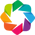

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

### Getting the data

In [ ]:
# Defining global constants for the instagram extract

# Note: These things may change without a warning...

# Instagram base url preffix
tagurl_prefix = 'https://www.instagram.com/explore/tags/'

# suffix to append to tag request url to retrieve data in JSON format
tagurl_suffix = '/?__a=1'

# suffix to end cursor when requesting posts by tag
tagurl_endcursor = '&max_id='

# a generic media post preffix (concat with media shortcode to view)
posturl_prefix = 'https://www.instagram.com/p/'

# target initial tags (we will run this with only one tag but the code can take multiple - just extend the list)
tags = ['machinelearning']

In [ ]:
# urls to initial tags using the above url-components
queries = [ tagurl_prefix + tag + tagurl_suffix for tag in tags ]

The response structure of this Insta endpoint is not really straightforward. You can read more about it in the original post.
The data is most likely composed on request by some large-scale graph database at returned. Instagram obviously assumes that the receiving site is a browser exploring public posts.

We also don't get all posts for some hashtag right away but a "page" ~25 posts.

To receive further posts, we need to pass a new requests specifying "our position" by providing an end_cursor.

This **end cursor** can be found in

```
response['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
```

#### Some thoughts on JSON

This brings us to JSON. Think of JSON objects as of combinations of dictionaries and lists that can contain most Python objects (e.g. lists, dictionaries, tuples, strings, ints etc.) that can be represented as text. Once parsed you can operate JSON objects just as any other dictionary or list in Python.
More about JSON - here:

In [ ]:
edges = []
for q in queries:    
    for i in range(10): # how many iterations/deepth ?
        r = rq.get(q).json()
        end_cursor = r['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
        edges.extend(r['graphql']['hashtag']['edge_hashtag_to_media']['edges'])
        print(i)
        q = q + tagurl_endcursor + end_cursor

JSONDecodeError: ignored

### Bringing the collected data into useful format...

In the next step we will take the rich raw posts data and extract only the information that we need for our analysis. We will just cut out owner-id (account that posted), a shortcode that we can use to identify the post and get more data on it in future if needed, and the text including the hashtags.

To make things more compact we not only extract the raw data but we also preprocess a bit.

The hashtags are incorporated within the post-text. Therefore, we pass the text of each post through a tokenizer, that identifies individual words and elements (such as emoji). We use the tweet-tokenizer from the NLTK library, which is made for working with social media data.

```
  tokens = tknzr.tokenize(text)
  tags = [x.strip('#') for x in tokens if x.startswith('#')]
```

The first line turns the text of the post in a list of tokens (words & co.). The second line picks out only the elements that start with a "#" and strips the "#" when adding them to a list.

Then we construct a dictionary with these values and append it to a list.

This gives us a list of dicitonaries - something that we can pass to Pandas to get a dataframe we can work with.

In [ ]:
post_dicts = [] #empty list

for post in edges: #iterate all raw posts

    if post['node']['edge_media_to_caption']['edges'] == []: # hop to the next if no text in the post
        continue

    post_dict = {} # empty dictionary
    id_owner = post['node']['owner']['id'] # pick out user-id
    shortcode = post['node']['shortcode'] # pick out short post identifier
    text = post['node']['edge_media_to_caption']['edges'][0]['node']['text'] # pick out post text

    # Pick hashtags from text
    tokens = tknzr.tokenize(text)
    tags = [x.strip('#') for x in tokens if x.startswith('#')]

    # fill in dictionary with values
    post_dict['id_owner'] = id_owner
    post_dict['shortcode'] = shortcode
    post_dict['tags'] = tags
    post_dict['text'] = text

    post_dicts.append(post_dict) #append the dictionary to a list of post-dictionaries

In [ ]:
# Create DF
posts_df = pd.DataFrame(post_dicts)

# Remove hashtags that are not a hashtag (emptyspace & mistakes)
posts_df['tags'] = posts_df['tags'].map(lambda t: [x for x in t if x.isalnum()])

# Kick out posts with 0 hashtags
posts_df = posts_df[posts_df['tags'].map(len) != 0]

### Simple stats

In [ ]:
# People with most posts (no names though)
posts_df['id_owner'].value_counts()

### Creating a graph

In [ ]:
# Create empty undirected Graph
G = nx.Graph()

We will construct the graph from hashtag combinations of each post. We will use `itertools.combinations` for that. Given a list of n objects this will create all possible unique combinations of size k (which we set to 2). Note, that we can build up the Graph sequentially. An edgelist contains all data we need.

In [ ]:
# Create the graph
for i in posts_df['tags']:
    G.add_edges_from(list(itertools.combinations(i,2)))

### Preprocessing the Graph

It can be a good idea to filter the Graph before analysing. For instance, we can remove all hashtags with low degree-centrality. This can be interpreted as - kicking out made up hashtags or extremely underused ones. We will calculate a percentile threshold and exclude everything under it.

In [ ]:
# Calculating degree centrality for the Graph
degree_centrality = nx.degree_centrality(G)

In [ ]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 20)

In [ ]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

### Analysing the Graph

Now we are going to calculate some network indicators and once done, we will export a DataFrame analyse them further.

In [ ]:
# Recalculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [ ]:
# Same for Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')

In [ ]:
# Same for community detection
communities = community.best_partition(G, resolution = 1)
nx.set_node_attributes(G, communities, 'community')

In [ ]:
graph_df = pd.DataFrame(dict(G.nodes(data=True))).T

In [ ]:
graph_df['community'].value_counts(normalize=True)

In [ ]:
# Find the 5 most popular hashtags for each identified community
tag_per_com = graph_df.groupby('community')['degree'].nlargest(5)

In [ ]:
tag_per_com[0]

### Bipartite graph between users and hashtags

Can we identify communities of users given their usage of hashtags?

In [ ]:
# Create a new graph
B = nx.Graph()

In [ ]:
# we will take the same data
posts_df.head()

In [ ]:
# We need to specify the nodes for level 0 - this will be our users
B.add_nodes_from(list(set(posts_df.id_owner)), bipartite=0)

In [ ]:
# Then we need to add hashtags nodes as level 1 nodes
B.add_nodes_from(list(set(itertools.chain(*posts_df.tags))), bipartite=1)

In [ ]:
# This quick loop will generate edges between users and hashtags
# Every time someone mentions a #hashtag, a link is created

bi_edges = []
for i in posts_df[['id_owner','tags']].iterrows(): # we do this row-by-row since each row is a post
    id_owner = i[1]['id_owner']
    for j in i[1]['tags']:
        bi_edges.append((id_owner, j)) # edges are appended to a list as a tuple (id_owner, hashtag)

In [ ]:
# Let's add the edges to our graph
B.add_edges_from(bi_edges)

In the next step we will project the graph onto the account-level. For this we need to get the nodesets of the 0 level. We also calculate the level 1 level (just because)

In [ ]:
# Extract a set of nodes with level 0
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}

# the remaining nodes are then level 1
bottom_nodes = set(B) - top_nodes

In [ ]:
# Let's project this graph using a weighted projection
G_proj = bipartite.weighted_projected_graph(B, top_nodes)

In [ ]:
# Again, we can identify communities
bi_communities = community.best_partition(G_proj, resolution = 1)
nx.set_node_attributes(G_proj, bi_communities, 'community')

In [ ]:
# Calculate eigenvector centrality and set it as an attribute
bi_eigenvector = nx.eigenvector_centrality(G_proj)
nx.set_node_attributes(G_proj, bi_eigenvector, 'eigenvector_centrality')

In [ ]:
# Create a new attribute "activity" - or propensity to spam
nx.set_node_attributes(G_proj, dict(posts_df.id_owner.value_counts()), 'activity' )

In [ ]:
# Do spammers connect more in terms of spamming about the same stuff?
print(nx.numeric_assortativity_coefficient(G_proj,'activity'))

In [ ]:
graph_proj_df = pd.DataFrame(dict(G_proj.nodes(data=True))).T

In [ ]:
graph_proj_df.head()

In [ ]:
# Find the 5 most central for each identified community
user_per_com = graph_proj_df.groupby('community')['eigenvector_centrality'].nlargest(5)

In [ ]:
user_per_com

### The assignment

Basically, try to repeat the exercise on your own with a term of your choice. 

1. Just run the code from before, where you replace 'machinelearning' with whatever discussion you are interested to map.
2. Create the query link as in the notebook.
3. Since the instaloader is not working at the moment (seems to be blocked), you have to click on the query link to get the output in your web-browser. C&P it then, and save it in a text file (something like the text editor. that saves unformatted text.)
4. Now you can analyse the  instagram network.

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

     |████████████████████████████████| 972kB 12.5MB/s 
     |████████████████████████████████| 14.8MB 311kB/s 
     |████████████████████████████████| 6.5MB 40.4MB/s 
     |████████████████████████████████| 18.3MB 262kB/s 
     |████████████████████████████████| 1.6MB 12.5MB/s 


In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip" #virker først hvis der skrives A i det sorte felt og enter ()
!unzip shapefiles_exercise.zip


--2020-12-02 19:45:59--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-02 19:45:59--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip.2’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.05s   

20

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

In [ ]:
# Load the data
stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [ ]:
# Your solutions from here...

In [ ]:
stoejdata.head()

DATAEJER  VEJBESTYRE  ...  GNSHAST222                        geometry
0      316       316.0  ...        50.7  POINT (666785.000 6174847.000)
1      316       316.0  ...        61.0  POINT (650362.000 6165481.000)
2      316       316.0  ...        39.6  POINT (670888.000 6165624.000)
3      316       316.0  ...        74.1  POINT (675622.000 6167385.000)
4      316       316.0  ...        58.7  POINT (668085.000 6163679.000)

[5 rows x 36 columns]

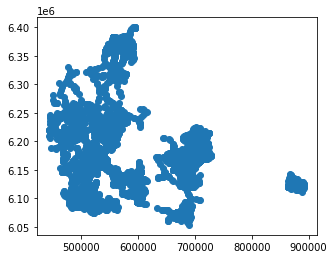

In [ ]:
stoejdata.plot()

In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

--2020-12-02 19:55:55--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip [following]
--2020-12-02 19:55:55--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip’

shapefiles.zip      100%[===================>]  31.21M   123MB/s    in 0.3s    

2020-12-02 19:55:55 (123 MB/s) - ‘shape

In [ ]:
municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

FEAT_ID  ...                                           geometry
0   149673  ...  POLYGON Z ((675926.480 6172129.210 -999.000, 6...
1   149674  ...  POLYGON Z ((687523.890 6176458.950 -999.000, 6...
2   149675  ...  POLYGON Z ((689361.510 6173523.720 -999.000, 6...
3   149676  ...  POLYGON Z ((689210.210 6174589.210 -999.000, 6...
4   149647  ...  POLYGON Z ((679613.660 6187623.990 -999.000, 6...

[5 rows x 25 columns]

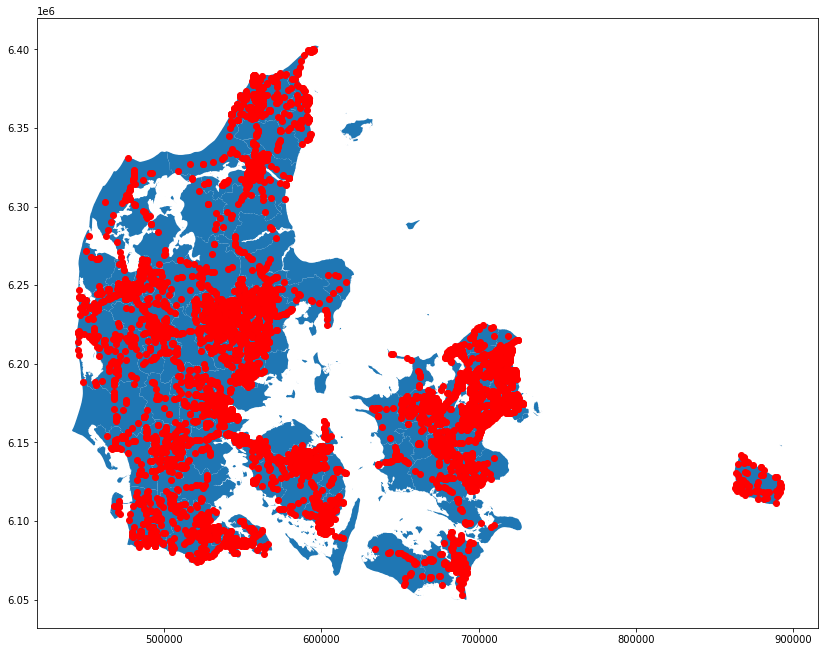

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
municipalities.plot(ax=ax)
stoejdata.plot(ax=ax, color="red")

In [ ]:
mun = municipalities.dissolve(by='KOMNAVN')

In [ ]:
mun.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Columns: 24 entries, geometry to TIMEOF_EXP
dtypes: float64(1), geometry(1), int64(3), object(19)
memory usage: 21.8+ KB


In [ ]:
stoejdata.crs # ETRS89

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
mun.crs #UTM32 koordinat

<Projected CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...>
Name: UTM32_EUREF89
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: EUREF89
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [ ]:
#ændres til samme koordinatsystem
mun2=mun.to_crs(epsg=3857)
stoej2=stoejdata.to_crs(epsg=3857)

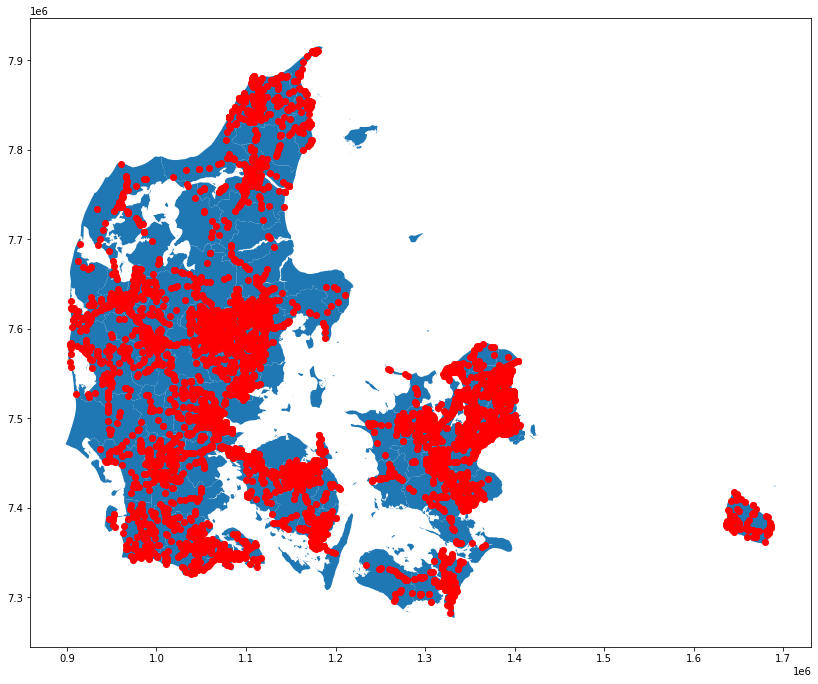

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
mun2.plot(ax=ax)
stoej2.plot(ax=ax, color="red")

In [ ]:
stoej_in_mun = gdp.sjoin(stoej2, mun2, how="right", op='within')

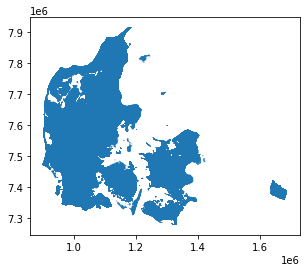

In [ ]:
stoej_in_mun.plot()

In [ ]:
#Opretter ny kolonne:
stoej_in_mun['mgdstoej'] = stoej_in_mun['GNSHAST071'].groupby(stoej_in_mun['KOMKODE']).transform('mean')

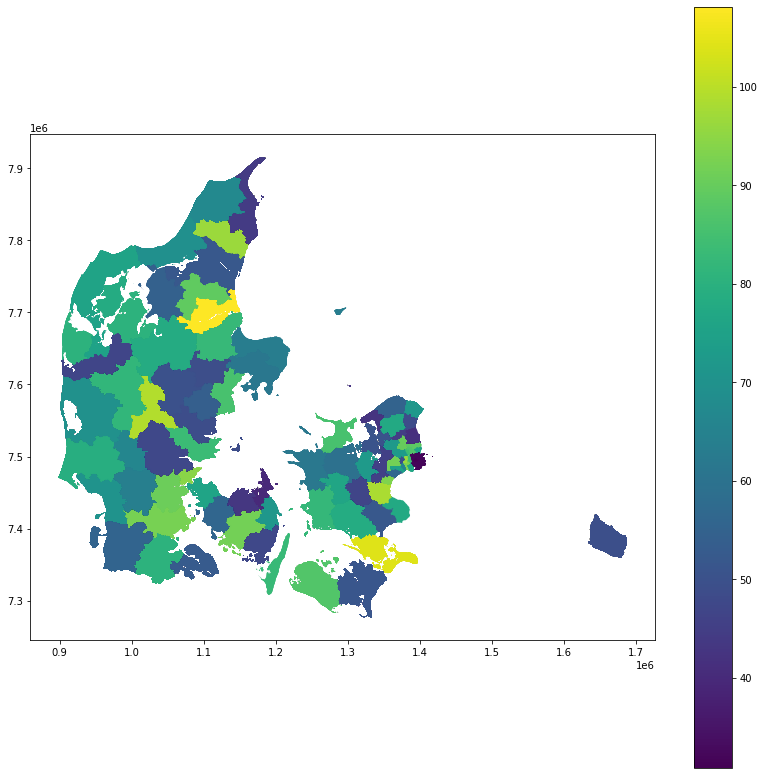

In [ ]:
stoej_in_mun.plot(column="mgdstoej", legend="True", figsize=(14,14))

In [ ]:
#Kan herefter sammenlignes med Rolfs kort over psyk-indlæggelser og kommuner:

In [ ]:
municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

FEAT_ID  ...                                           geometry
0   149673  ...  POLYGON Z ((675926.480 6172129.210 -999.000, 6...
1   149674  ...  POLYGON Z ((687523.890 6176458.950 -999.000, 6...
2   149675  ...  POLYGON Z ((689361.510 6173523.720 -999.000, 6...
3   149676  ...  POLYGON Z ((689210.210 6174589.210 -999.000, 6...
4   149647  ...  POLYGON Z ((679613.660 6187623.990 -999.000, 6...

[5 rows x 25 columns]

In [ ]:
print(municipalities.columns)

Index(['FEAT_ID', 'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT', 'GEOM_STTXT',
       'DAGI_ID', 'AREAL', 'REGIONKODE', 'REGIONNAVN', 'GYLDIG_FRA',
       'GYLDIG_TIL', 'KOMKODE', 'KOMNAVN', 'DQ_SPECIFK', 'DQ_STATEM',
       'DQ_DESCR', 'DQ_PROCESS', 'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV',
       'TIMEOF_CRE', 'TIMEOF_PUB', 'TIMEOF_REV', 'TIMEOF_EXP', 'geometry'],
      dtype='object')


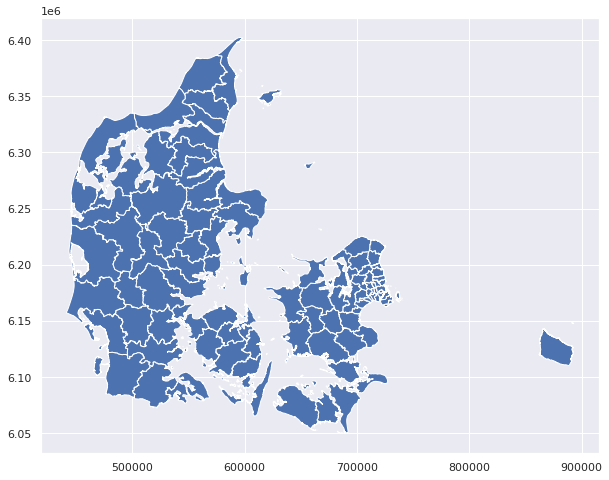

In [ ]:
municipalities.plot()

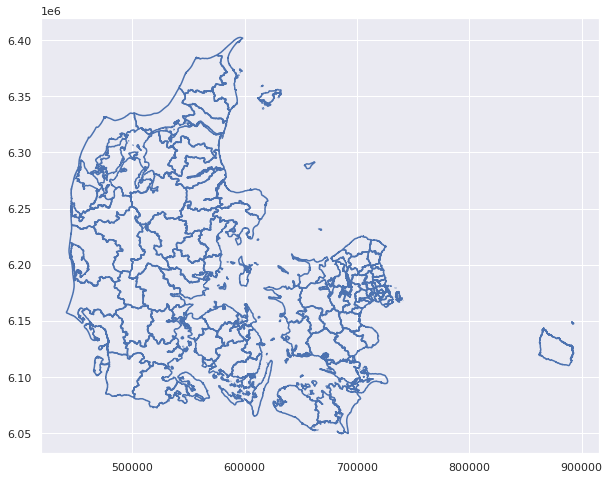

In [ ]:
municipalities.boundary.plot()

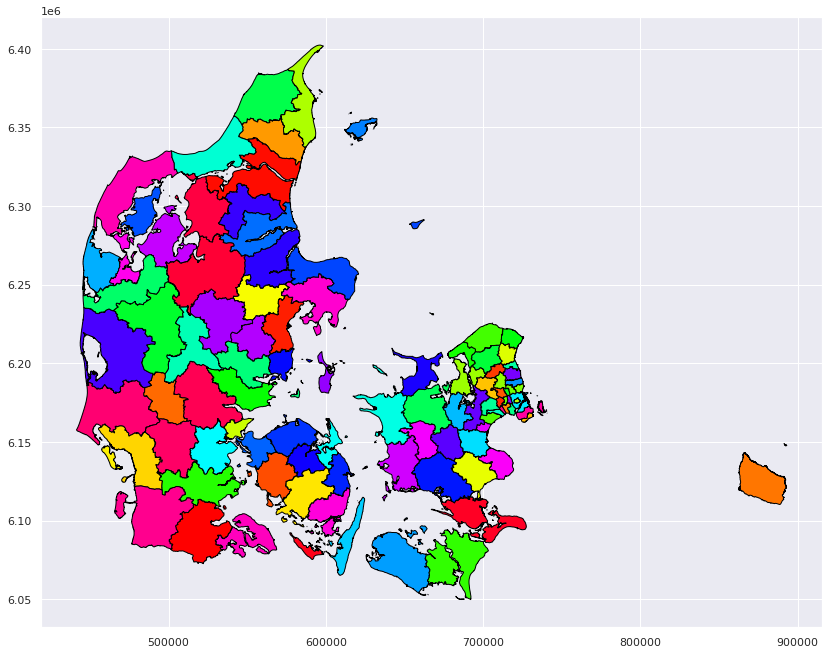

In [ ]:
municipalities.plot(cmap='hsv', edgecolor='black', column='KOMNAVN', figsize=(14,14))

In [ ]:
municipalities.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Columns: 25 entries, FEAT_ID to geometry
dtypes: float64(1), geometry(1), int64(3), object(20)
memory usage: 307.7+ KB


In [ ]:
print(municipalities.loc[1:50, ['KOMNAVN']])

          KOMNAVN
1           Lejre
2           Lejre
3           Lejre
4   Frederikssund
5   Frederikssund
6      Fredericia
7      Fredericia
8      Fredericia
9          Lemvig
10         Lemvig
11   Guldborgsund
12       Slagelse
13       Slagelse
14       Slagelse
15       Slagelse
16    Vordingborg
17    Vordingborg
18    Vordingborg
19    Vordingborg
20  Frederikssund
21  Frederikssund
22         Lemvig
23        Thisted
24        Thisted
25        Thisted
26        Thisted
27        Thisted
28        Thisted
29       Slagelse
30       Slagelse
31       Slagelse
32       Slagelse
33       Slagelse
34       Slagelse
35       Slagelse
36       Slagelse
37    Vordingborg
38    Vordingborg
39    Vordingborg
40  Frederikssund
41  Frederikssund
42  Frederikssund
43        Thisted
44         Lemvig
45    Christiansø
46    Christiansø
47       Slagelse
48       Slagelse
49       Slagelse
50       Slagelse


In [ ]:
mun = municipalities.dissolve(by='KOMNAVN')

In [ ]:
mun.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Columns: 24 entries, geometry to TIMEOF_EXP
dtypes: float64(1), geometry(1), int64(3), object(19)
memory usage: 21.8+ KB


In [ ]:
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")
mun_data.head()

omr  alt2016  psyk2016  psykratio
0      København    64735      1326   0.020484
1  Frederiksberg    12364       258   0.020867
2         Dragør     1746        54   0.030928
3         Tårnby     5614       158   0.028144
4    Albertslund     3686        76   0.020619

In [ ]:
mun_fun = mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")
mun_fun.head()

geometry  ...  psykratio
0  MULTIPOLYGON Z (((532611.300 6079233.260 -999....  ...   0.015536
1  MULTIPOLYGON Z (((577131.740 6306752.540 -999....  ...   0.018536
2  MULTIPOLYGON Z (((580132.510 6230146.780 -999....  ...   0.016495
3  POLYGON Z ((711377.280 6178342.550 -999.000, 7...  ...   0.020619
4  POLYGON Z ((701094.650 6192181.200 -999.000, 7...  ...   0.009304

[5 rows x 28 columns]

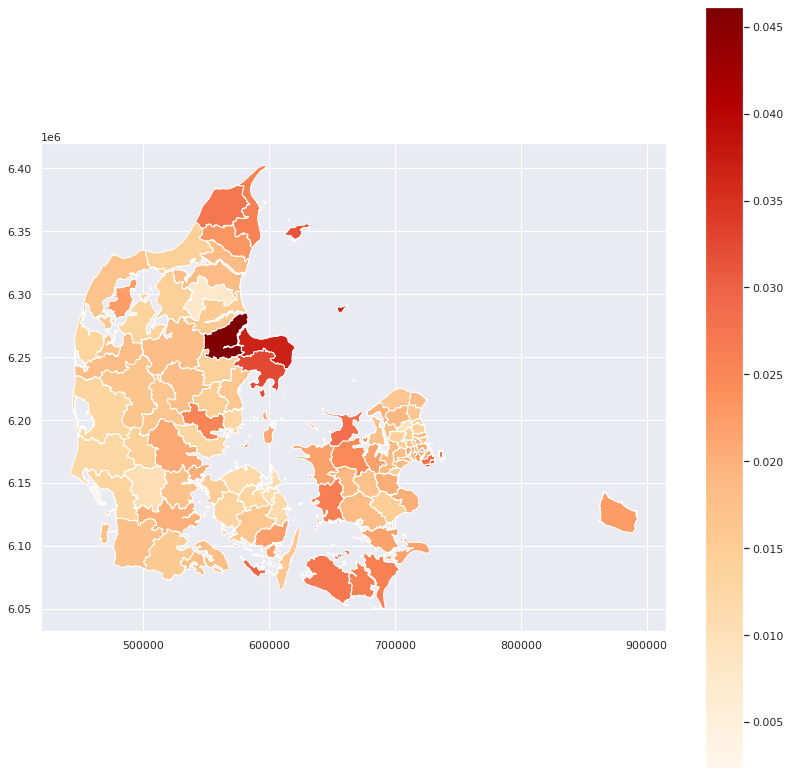

In [ ]:
mun_fun.plot(column="psykratio", legend="True", figsize=(14,14), cmap='OrRd')

In [ ]:
#kan altså se at der er høj koncentration af psykiske indlæggelser især omkring Randers og generelt Djursland og sydsjælland / Lolland-Falster. 
#kan sammenlignes med vores støj-in-mun plot længere oppe, hvor vi så høj støjkoncentration omkring Hobro (Rolf- det er lige nord for Randers), og ellers syd-sjælland og også lidt i Midtjylland.

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

#Sammenholdes med pipeline fra "Intro to nlp and supervised tasks"

In [ ]:
import pandas as pd
%matplotlib inline 
import numpy as np
!pip -q install eli5 

     |████████████████████████████████| 112kB 6.0MB/s 


In [ ]:
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [ ]:
data.head(5)

0     1
0  I was thrilled to be back in the Great city of...  True
1  The Unsolicited Mail In Ballot Scam is a major...  True
2  As long as I am President, I will always stand...  True
3  Our Economy is doing great, and is ready to se...  True
4  If I do not sound like a typical Washington po...  True

In [ ]:
data.shape

(14736, 2)

In [ ]:
# define in and outputs

X = data[0].values
y = data[1].values

In [ ]:
X

array(['I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST!',
       'The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it.',
       'As long as I am President, I will always stand with the HEROES of Law Enforcement!',
       ...,
       'The Washington Post, after having been so dishonest in the past, is finally reporting the real story!Just landed in Arizona where we will win the Great State of Arizona in November. It is called the Great State of Arizona. #Trump2016 day in Colorado! Congratulations to Dan Conway.',
       'No one else did so well in many decades of being treated fairly. Thank you! #INPrimary @DevinNunes (@DevinNunesForCongress) is a great man who has been through a number of tough times and was able to put up a solid fight.',
       '#KAG2020 are sending a delegati

In [ ]:
y

array([ True,  True,  True, ..., False, False, False])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data in 80% trainig 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [ ]:
# 1) Simple BoW vectorizer (bag of words) - optæller frekvens af hvor tit ordene kommer.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [ ]:
# Train the model
model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model 80% accuracy
model.score(X_test_vec_1, y_test)

0.8059701492537313

In [ ]:
# Predict on new data
y_pred = model.predict(X_test_vec_1)

In [ ]:
# confusion matrix by hand... :-)

pd.crosstab(y_test, y_pred)

col_0  False  True 
row_0              
False   1180    309
True     263   1196

In [ ]:
# 2) Or TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model - 81% accuracy
model.score(X_test_vec_2, y_test)

0.8171641791044776

In [ ]:
import eli5 # vectorizer = TDIDF. Kan se at de grønne er de ord der oftest forekommer i true tweets fra Trump. 
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['False','True'], top=50)

In [ ]:
X_test[0]

'Gov Kasich voted for NAFTA, which devastated Ohio and is now pushing TPP hard- bad for American workers!'

In [ ]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['False','True'])

In [ ]:
preds_array = model.predict_proba(X_test_vec_2)

In [ ]:
preds_array[:,1]

array([0.67935772, 0.75608666, 0.13428755, ..., 0.34302019, 0.67398903,
       0.83636925])

In [ ]:
predsDF = pd.DataFrame({'text':X_test, 'pred_pos':preds_array[:,1], 'y_test':y_test})

In [ ]:
predsDF['diff_error'] =  predsDF.pred_pos - predsDF.y_test

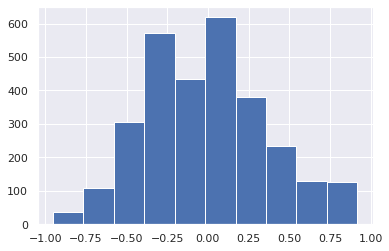

In [ ]:
predsDF.diff_error.hist()

In [ ]:
predsDF.sort_values('diff_error', ascending=True).iloc[0,0]

'To all of the great people who are working so hard for your Country and not getting paid I say, THANK YOU - YOU ARE GREAT PATRIOTS!'

#Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration



In [ ]:
# Let's fire up spacy (spaCy is an open-source software library for advanced natural language processing)

import spacy

# and load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

# find more models for other languages here: https://spacy.io/models/

In [ ]:
X_test[1]

'Texas LC George P. Bush backed me when it wasn’t the politically correct thing to do, and I back him now.'

In [ ]:
doc = nlp(X_test[1]) #Spacy docs have POS (part of speech) and ENT (entity anotation) - let's see how we can use that to filter (bootstrap) a nice dictionary for future use.

In [ ]:
# let's look at the POS tags
[(tok.text, tok.pos_) for tok in doc]

[('Texas', 'PROPN'),
 ('LC', 'PROPN'),
 ('George', 'PROPN'),
 ('P.', 'PROPN'),
 ('Bush', 'PROPN'),
 ('backed', 'VERB'),
 ('me', 'PRON'),
 ('when', 'ADV'),
 ('it', 'PRON'),
 ('was', 'AUX'),
 ('n’t', 'PART'),
 ('the', 'DET'),
 ('politically', 'ADV'),
 ('correct', 'ADJ'),
 ('thing', 'NOUN'),
 ('to', 'PART'),
 ('do', 'AUX'),
 (',', 'PUNCT'),
 ('and', 'CCONJ'),
 ('I', 'PRON'),
 ('back', 'VERB'),
 ('him', 'PRON'),
 ('now', 'ADV'),
 ('.', 'PUNCT')]

In [ ]:
# Let's tokenize the first 1000 articles (that should take around 1 minute with this approach)
tokenlist = []
for doc in nlp.pipe(X_train[:1000]):
  tokens =[tok.text.lower() for tok in doc if tok.pos_ in ['NOUN','ADJ','ADV','VERB'] and not tok.is_stop]
  tokenlist.append(tokens)

In [ ]:
from gensim.corpora.dictionary import Dictionary

In [ ]:
dictionary = Dictionary(tokenlist)

In [ ]:
len(dictionary)

2457

In [ ]:
# vi vælger ikke at køre extreme filters, da vi da kun når ned på 389 forskellige ord - er for lidt
#dictionary.filter_extremes(no_below=5, no_above=0.2) #frasorterer de mest almindelige ord og sjældne ord

In [ ]:
vectorizer = TfidfVectorizer(vocabulary=list(dictionary.values()))
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=1000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test_vec_2 = vectorizer.fit_transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.7381275440976933

In [ ]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','positive'], top=50)

In [ ]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['negative','positive'])

#Prøver nu en anden metode der hedder SVD:
 singular value decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular values

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier

tfidf = TfidfVectorizer(vocabulary=list(dictionary.values()))
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
clf = MLPClassifier(verbose=False)


pipe = make_pipeline(tfidf, svd, clf)

pipe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rat

In [ ]:
pipe.score(X_test, y_test)

0.7564450474898237

In [ ]:
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(X_test[0], pipe.predict_proba)
te.show_prediction(target_names=['negative','positive'])